# Interactive Data Exploration

This notebook demonstrates how the functions and techniques we covered in the first notebook can be combined to build interactive data exploration tools. The panel enables exploration of LIS output using an interactive map.

**Note: some cells below take several minutes to run and some aspects of the interactive widgets may not work in the rendered version on the Hackweek site.**

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import geopandas
import xarray as xr
import fsspec
import s3fs
from datetime import datetime as dt
from scipy.spatial import distance

import holoviews as hv, geoviews as gv
from geoviews import opts
from geoviews import tile_sources as gvts

from datashader.colors import viridis
import datashader
from holoviews.operation.datashader import datashade, shade, dynspread, spread, rasterize

from holoviews.streams import Selection1D, Params
import panel as pn
import param as pm
import hvplot.pandas 
import hvplot.xarray
import warnings
import holoviews.operation.datashader as hd
warnings.filterwarnings("ignore")

In [2]:
pn.extension()
pn.param.ParamMethod.loading_indicator =True

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
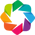

In [3]:
# create S3 filesystem object
s3 = s3fs.S3FileSystem()

# define S3 bucket name
bucket = "s3://eis-dh-hydro/SNOWEX-HACKWEEK"

# set holoviews backend to Bokeh
gv.extension('bokeh')

## Load Data

### SNOTEL Sites info

In [4]:
# create dictionary linking state names and abbreviations
snotel = {"AZ" : "arizona",
          "CO" : "colorado",
          "ID" : "idaho",
          "MT" : "montana", 
          "NM" : "newmexico",
          "UT" : "utah",
          "WY" : "wyoming"}

In [5]:
# load SNOTEL site metadata for sites in the given state
def load_site(state):
    
    # define path to file
    key = f"SNOTEL/snotel_{state}.csv"
    
    # load csv into pandas DataFrame
    df = pd.read_csv(s3.open(f'{bucket}/{key}', mode='r'))
    
    return df 

### SNOTEL Depth & SWE

In [6]:
def load_snotel_txt(state, var):
    
    # define path to file
    key = f"SNOTEL/snotel_{state}{var}_20162020.txt"

    # open text file
    fh = s3.open(f"{bucket}/{key}")
    
    # read each line and note those that begin with '#'
    lines = fh.readlines()
    skips = sum(1 for ln in lines if ln.decode('ascii').startswith('#'))
    
    # load txt file into pandas DataFrame (skipping lines beginning with '#')
    df = pd.read_csv(s3.open(f"{bucket}/{key}"), skiprows=skips)
    
    # convert Date column from str to pandas datetime objects
    df['Date'] = pd.to_datetime(df['Date'])
    return df

In [7]:
# load SNOTEL depth & swe into dictionaries

# define empty dicts
snotel_depth = {}
snotel_swe = {}

# loop over states and load SNOTEL data
for state in snotel.keys():
    print(f"Loading state {state}")
    snotel_depth[state] = load_snotel_txt(state, 'depth')
    snotel_swe[state] = load_snotel_txt(state, 'swe')

Loading state AZ
Loading state CO
Loading state ID
Loading state MT
Loading state NM
Loading state UT
Loading state WY


### SNODAS Depth & SWE

Like the LIS output we have been working with, a sample of SNODAS data is available on our S3 bucket in Zarr format. We can therefore load the SNODAS just as we load the LIS data.

In [8]:
# load snodas depth data
key = "SNODAS/snodas_snowdepth_20161001_20200930.zarr"
snodas_depth = xr.open_zarr(s3.get_mapper(f"{bucket}/{key}"), consolidated=True)

# load snodas swe data
key = "SNODAS/snodas_swe_20161001_20200930.zarr"
snodas_swe = xr.open_zarr(s3.get_mapper(f"{bucket}/{key}"), consolidated=True)

### LIS Outputs

Next we'll load the LIS outputs. First, we'll define the helper function we saw in the previous notebook that adds `lat` and `lon` as coordinate variables. We'll use this immediately upon loading the data.

In [9]:
def add_latlon_coords(dataset: xr.Dataset)->xr.Dataset:
    """Adds lat/lon as dimensions and coordinates to an xarray.Dataset object."""
    
    # get attributes from dataset
    attrs = dataset.attrs
    
    # get x, y resolutions
    dx = .001 #round(float(attrs['DX']), 3)
    dy = .001 #round(float(attrs['DY']), 3)
   
    
    # get grid cells in x, y dimensions
    ew_len = len(dataset['east_west'])
    ns_len = len(dataset['north_south'])
    #ew_len = len(dataset['lon'])
    #ns_len = len(dataset['lat'])
    
    # get lower-left lat and lon
    ll_lat = round(float(attrs['SOUTH_WEST_CORNER_LAT']), 3)
    ll_lon = round(float(attrs['SOUTH_WEST_CORNER_LON']), 3)
    
    # calculate upper-right lat and lon
    ur_lat =  41.5122 #ll_lat + (dy * ns_len)
    ur_lon = -103.9831 #ll_lon + (dx * ew_len)
    
    # define the new coordinates
    coords = {
        # create an arrays containing the lat/lon at each gridcell
        'lat': np.linspace(ll_lat, ur_lat, ns_len, dtype=np.float32, endpoint=False).round(4),
        'lon': np.linspace(ll_lon, ur_lon, ew_len, dtype=np.float32, endpoint=False).round(4)
    }
    
    lon_attrs = dataset.lon.attrs
    lat_attrs = dataset.lat.attrs
    
    # rename the original lat and lon variables
    dataset = dataset.rename({'lon':'orig_lon', 'lat':'orig_lat'})
    # rename the grid dimensions to lat and lon
    dataset = dataset.rename({'north_south': 'lat', 'east_west': 'lon'})
    # assign the coords above as coordinates
    dataset = dataset.assign_coords(coords)
    dataset.lon.attrs = lon_attrs
    dataset.lat.attrs = lat_attrs
    
    
    return dataset

Load the LIS data and apply `add_latlon_coords()`:

In [10]:
# LIS surfacemodel DA_10km
#key = "2022/ZARR/SURFACEMODEL/LIS_HIST_default_chunks.d01.zarr"
key = "2022/ZARR/SURFACEMODEL/LIS_HIST_rechunkedV4.d01.zarr"
s3_mapper = s3.get_mapper(f"{bucket}/{key}")
lis_sf = xr.open_zarr(s3_mapper, consolidated=True)
lis_sf = add_latlon_coords(lis_sf)
drop_vars = ['orig_lat', 'orig_lon']
lis_sf = lis_sf.drop(drop_vars)

<xarray.Dataset>
Dimensions:              (east_west: 4800, north_south: 6650, time: 1694)
Coordinates:
    lat                  (time, north_south, east_west) float32 dask.array<chunksize=(100, 665, 480), meta=np.ndarray>
    lon                  (time, north_south, east_west) float32 dask.array<chunksize=(100, 665, 480), meta=np.ndarray>
  * time                 (time) datetime64[ns] 2016-09-02 ... 2021-04-22
Dimensions without coordinates: east_west, north_south
Data variables:
    SM_SWE_inst          (time, north_south, east_west) float32 dask.array<chunksize=(100, 665, 480), meta=np.ndarray>
    SM_SnowDensity_inst  (time, north_south, east_west) float32 dask.array<chunksize=(100, 665, 480), meta=np.ndarray>
    SM_SnowDepth_inst    (time, north_south, east_west) float32 dask.array<chunksize=(100, 665, 480), meta=np.ndarray>
Attributes: (12/18)
    DX:                      0.10000000149011612
    DY:                      0.10000000149011612
    MAP_PROJECTION:          LAMBERT CONFORMAL
    NUM_SOIL_LAYERS:         1
    SOIL_LAYER_THICKNESSES:  1.0
    SOUTH_WEST_CORNER_LAT:   35.49998092651367
    ...                      ...
    history:                 created on date: 2022-05-16T17:12:56.387
    institution:             NASA GSFC
    missing_value:           -9999.0
    references:              Kumar_etal_EMS_2006, Peters-Lidard_etal_ISSE_2007
    source:                  
    title:                   LIS land surface model output

Working with the full LIS output dataset can be slow and consume lots of memory. Here we temporally subset the data to a shorter window of time. The full dataset contains daily values from 09/02/2016 to 4/22/2021. Feel free to explore the full dataset by modifying the `time_range` variable below and re-running all cells that follow.

In [12]:
# subset LIS data for winter 2020 
time_range = slice('2019-10-01', '2020-04-30')
lis_sf = lis_sf.sel(time=time_range)

In the next cell, we extract the data variable names and timesteps from the LIS outputs. These will be used to define the widget options.

In [17]:
# gather metadata from LIS

# get variable names:string
vnames = list(lis_sf.data_vars)
print(vnames)

# get time-stamps:string
tstamps = list(np.datetime_as_string(lis_sf.time.values, 'D'))
print(len(tstamps), tstamps[0], tstamps[-1])

['SM_SWE_inst', 'SM_SnowDensity_inst', 'SM_SnowDepth_inst']
213 2019-10-01 2020-04-30


By default, the `holoviews` plotting library automatically adjusts the range of plot colorbars based on the range of values in the data being plotted. This may not be ideal when comparing data on different timesteps. In the next cell we assign the upper and lower bounds for each data variable which we'll later use to set a static colorbar range.

In [13]:
cmap_lims = {'SM_SWE_inst': (-1.3111445262836696e-10, 3.0499227046966553),
 'SM_SnowDensity_inst': (99.99999237060547, 550.0),
 'SM_SnowDepth_inst': (-1.0889861234986142e-09, 6.424593448638916)}

In [14]:
cmap_lims

{'SM_SWE_inst': (-1.3111445262836696e-10, 3.0499227046966553),
 'SM_SnowDensity_inst': (99.99999237060547, 550.0),
 'SM_SnowDepth_inst': (-1.0889861234986142e-09, 6.424593448638916)}

## Interactive widget to explore model output

The cell below creates a `panel` layout for exploring LIS output rasters. Select a variable using the drop down and then use the date slider to scrub back and forth in time!

In [15]:
%%time
# start and end dates
start_date = '2020-01-01'
end_date = '2020-01-07'

date_fmt = '%Y-%m-%d'
b = dt.strptime(start_date, date_fmt)
e = dt.strptime(end_date, date_fmt)

lis_sub = lis_sf.sel(time=slice(start_date, end_date)).load()

CPU times: user 1min 27s, sys: 1min 3s, total: 2min 31s
Wall time: 1min 52s


In [19]:
# date widget (slider & key in)
# define date widgets
date_slider = pn.widgets.DateSlider(start=b, end=e, value=b, name="LIS Model Date")
dt_input = pn.widgets.DatetimeInput(name='LIS Model Date Input', value=b, format=date_fmt)
date_stream = Params(date_slider, ['value'], rename={'value':'date'})

# variable widget
var_select = pn.widgets.Select(options=vnames, name="LIS Variable List")
var_stream = Params(var_select, ['value'], rename={'value':'vname'})

#colorbar widget
color_bar_range = pn.widgets.RangeSlider(name="Color Bar Range", start=0, end=1, value=(0., 1.), step=0.01)
cbar_strem = Params(color_bar_range, ['value'], rname={'value':'clim'})


# base map widget
map_layer= pn.widgets.RadioButtonGroup(
    name='Base map layer',
    options=['Open Street Map', 'Satellite Imagery'],
    value='Satellite Imagery',
    button_type='primary',
    background='#f307eb')

# lis output display callback function
# returns plot of LIS output when date/variable is changed
def var_layer(vname, date, clim):
    t_stamp = dt.strftime(date, '%Y-%m-%d')
    dssm = lis_sub[vname].sel(time=t_stamp)

    image = dssm.hvplot(geo=True)
    #clim = cmap_lims[vname]
    return image.opts(clim=clim)

# watches date widget for updates
@pn.depends(dt_input.param.value, watch=True)
def _update_date(dt_input):
    date_slider.value=dt_input

@pn.depends(var_select.param.value, watch=True)
def _update_range(var_select):
    vname=var_select
    t=cmap_lims[vname]
    color_bar_range.start=t[0]
    color_bar_range.end=t[1]
    color_bar_range.value=t
    
# updates basemap on widget change
def update_map(maps):
    tile = gvts.OSM if maps=='Open Street Map' else gvts.EsriImagery
    return tile.opts(alpha=0.7)

# link widgets to callback functions
streams = dict(vname=var_select.param.value, date=date_slider.param.value, clim=color_bar_range.param.value)        
dmap = hv.DynamicMap(var_layer, streams=streams)
dtile = hv.DynamicMap(update_map, streams=dict(maps=map_layer.param.value))

# create panel layout of widgets and plot
pn.Column(var_select, date_slider, dt_input, map_layer,color_bar_range,
          dtile*rasterize(dmap, aggregator=datashader.mean()).opts(cmap=viridis,colorbar=True,width=800, height=600))


Column
    [0] Select(name='LIS Variable List', options=['SM_SWE_inst', ...], value='SM_SWE_inst')
    [1] DateSlider(end=datetime.datetime(2020, ..., name='LIS Model Date', start=datetime.datetime(2020, ..., value=datetime.datetime(2020, ...)
    [2] DatetimeInput(format='%Y-%m-%d', name='LIS Model Date Input', type=<class 'datetime.datetime'..., value=datetime.datetime(2020, ...)
    [3] RadioButtonGroup(background='#f307eb', button_type='primary', name='Base map layer', options=['Open Street Map', ...], value='Satellite Imagery')
    [4] RangeSlider(name='Color Bar Range', step=0.01)
    [5] HoloViews(DynamicMap)

Thank you for joining us for this tutorial. We hope that you are now more familiar with [NASA's Land Information System](https://lis.gsfc.nasa.gov/) and how to use Python to explore and use the model simulation output LIS generates. For more information please see the links under More information below

## More Information

**Links**

* [LIS Website](https://lis.gsfc.nasa.gov/)
* [LIS on GitHub](https://github.com/NASA-LIS/LISF)
* [LIS Documentation](https://github.com/NASA-LIS/LISF/blob/master/docs/)
* [LIS Test Case Walkthrough](https://github.com/bmcandr/lis-public-tc-walkthrough)

**References**

* Kumar, S.V., C.D. Peters-Lidard, Y. Tian, P.R. Houser, J. Geiger, S. Olden, L. Lighty, J.L. Eastman, B. Doty, P. Dirmeyer, J. Adams, K. Mitchell, E. F. Wood, and J. Sheffield, 2006: Land Information System - An interoperable framework for high resolution land surface modeling. Environ. Modeling & Software, 21, 1402-1415, [doi:10.1016/j.envsoft.2005.07.004](https://doi.org/10.1016/j.envsoft.2005.07.004)

* Peters-Lidard, C.D., P.R. Houser, Y. Tian, S.V. Kumar, J. Geiger, S. Olden, L. Lighty, B. Doty, P. Dirmeyer, J. Adams, K. Mitchell, E.F. Wood, and J. Sheffield, 2007: High-performance Earth system modeling with NASA/GSFC's Land Information System. Innovations in Systems and Software Engineering, 3(3), 157-165, [doi:10.1007/s11334-007-0028-x](https://doi.org/10.1007/s11334-007-0028-x)
```